# <p style="text-align: center;">Converting the Text to vectors.</p>

# Word Embeddings : 
    
word embedding is a process of converting words into a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.

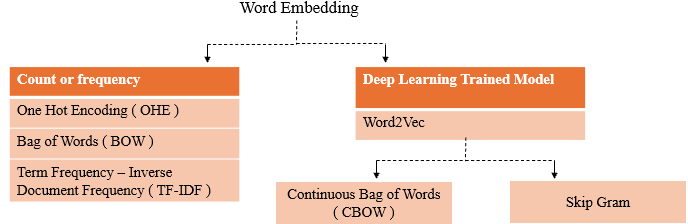

* One Hot Encoding
* Bag of Words (BOW)
* Term Frequency - Inverse Document Frequency (TF-IDF)
* Word2vec
* AvgWord2vec
* GRU

# 1. One Hot Encoding

##### Step 1 : Find the vocabulary (Unique words)

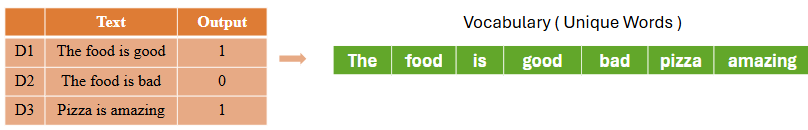

##### Step 2 : Create vectors for each word in the document using vocabulary

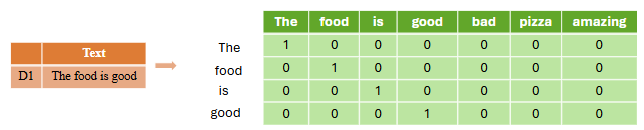

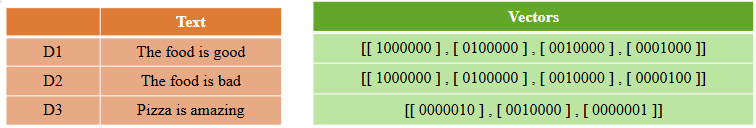

##### Disadvantages

* Sparse matrix (more 0's and 1's) leads to overfitting.
* The ML Algorithm needs only fixed size I/P
* No semantic meaning is getting captured.
* Out of vocabulary (oov) --> if new test data has words which is not present in vocabulary, we may not able to create vector.
* In real world data, the vocabulary will be will large.

# 2. Bag Of Words

##### Step 1 : preprocess the data

* Lower the sentence, remove stop words , remove unwanted characters , Stemming , lemmatization.

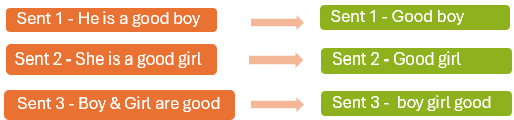

##### Step 2 : Create histogram / frequency table

* create a frequency count for all the unique words in the dataset.
* The frequency should be sorted in a decending order

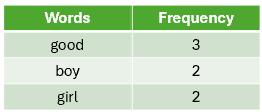

##### Step 3 : Convert to Document matrix

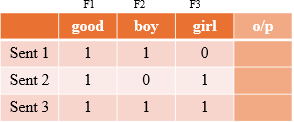

* create a frequency count of the words with respect to each sentence.
* Then the features F1, F2, F3 are taken as independent features and trained on a machine learning algorithm.

##### There are 2 types of BOW

* Bag of words : It shows only 1 and 0.. eg : girl good girl --> 1,0,1
* Binary BOW : Count will get updated based on frequency.. eg : girl good girl --> 1,0,2

##### Advantages:

* fixed size of input vector which can help with ml algorithm.

##### Disadvantages:

* Sparse matrix (more 0's and 1's) leads to overfitting.
* Ordering of the word is changing because of frequency table, so meaning of the sentence changes.
* Out of vocabulary (oov) --> if new test data has words which is not present in vocabulary, we may not able to create vector.
* semantic information is not captured, it gives same importance to multiple words.

##### Semantic Information not stored why ?

1. The food is good -->  [1 1 1 1]
2. The food not good --> [1 1 0 1] 
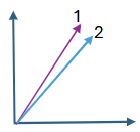

It says the difference between sent 1, sent 2 is minor.. but we have complete opposite sentence.

##### Important : Since Bag of words gives same importance to every term regardless of its relevance, we go for TF-IDF.

### Practical Implementation

##### Step 1 : Read the data

In [14]:
paragraph = "The Bible does not give one specific definition of God. Instead, it assumes God's existence from the beginning and reveals His nature and work throughout. God is understood as the supreme being and the creator of the universe."
print(paragraph)

The Bible does not give one specific definition of God. Instead, it assumes God's existence from the beginning and reveals His nature and work throughout. God is understood as the supreme being and the creator of the universe.


##### Step 2 : Cleaning the texts

In [10]:
# Import the Libraries

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Create an object

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

# Tokenization

sentences = nltk.sent_tokenize(paragraph)

# Cleaning

corpus = []
for i in range(len(sentences)):
    clean = re.sub('[^A-Za-z0-9]', ' ',sentences[i])
    clean = clean.lower()
    clean = ' '.join([wordnet.lemmatize(word) for word in clean.split() if word not in stop_words])
    corpus.append(clean)

In [11]:
corpus

['bible give one specific definition god',
 'instead assumes god existence beginning reveals nature work throughout',
 'god understood supreme creator universe']

##### Step 3 : Create Bag of word Model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [8]:
X

array([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]],
      dtype=int64)

# 3. TF - IDF (Term Frequency and Inverse Document Frequency)

* BOW does not show much semantic difference between the words , because it is represented in 0,1,2 etc..
* TF-IDF gives more semantic meaning than BOW. 

##### Step 1 : preprocess the data

* Lower the sentence, remove stop words , remove unwanted characters , Stemming , lemmatization.

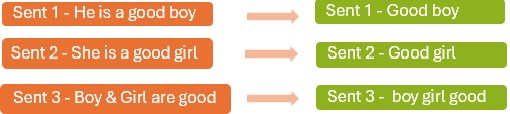

##### Step 2 : Create histogram / frequency table

* create a frequency count for all the words in the sentence.
* The frequency should be sorted in a decending order

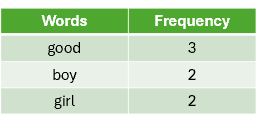

##### Step 3 : Calculate TF (Term Frequency) and IDF (Inverse Document Frequency)

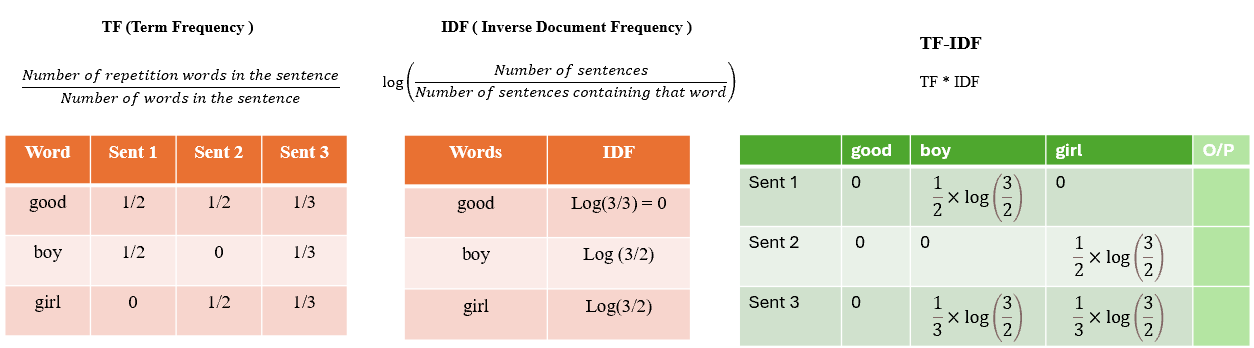

##### Advantages:

* fixed size of input vector which can help with ml algorithm.
* Word importance is getting captured.

##### Disadvangaes:

* Sparse matrix (more 0's and 1's) leads to overfitting.
* Out of vocabulary (oov) --> if new test data has words which is not present in vocabulary, we may not able to create vector.
* semantic information is not stored, TF-IDF gives importance to uncommon words.

### Practical Implementation

##### Step 1 : Read the data

In [15]:
paragraph = "The Bible does not give one specific definition of God. Instead, it assumes God's existence from the beginning and reveals His nature and work throughout. God is understood as the supreme being and the creator of the universe."
print(paragraph)

The Bible does not give one specific definition of God. Instead, it assumes God's existence from the beginning and reveals His nature and work throughout. God is understood as the supreme being and the creator of the universe.


##### Step 2 : Cleaning the texts

In [16]:
# Import the Libraries

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Create an object

stop_words = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()

# Tokenization

sentences = nltk.sent_tokenize(paragraph)

# Cleaning

corpus = []
for i in range(len(sentences)):
    clean = re.sub('[^A-Za-z0-9]', ' ',sentences[i])
    clean = clean.lower()
    clean = ' '.join([wordnet.lemmatize(word) for word in clean.split() if word not in stop_words])
    corpus.append(clean)

In [17]:
corpus

['bible give one specific definition god',
 'instead assumes god existence beginning reveals nature work throughout',
 'god understood supreme creator universe']

##### Step 3 : Create TF-IDF Model

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0.        , 0.        , 0.43238509, 0.        , 0.43238509,
        0.        , 0.43238509, 0.2553736 , 0.        , 0.        ,
        0.43238509, 0.        , 0.43238509, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.34608857, 0.34608857, 0.        , 0.        , 0.        ,
        0.34608857, 0.        , 0.20440549, 0.34608857, 0.34608857,
        0.        , 0.34608857, 0.        , 0.        , 0.34608857,
        0.        , 0.        , 0.34608857],
       [0.        , 0.        , 0.        , 0.47952794, 0.        ,
        0.        , 0.        , 0.28321692, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.47952794, 0.        ,
        0.47952794, 0.47952794, 0.        ]])

# 4. Word2Vec

* The Word2Vec uses a neural network model to learn word associations from large corpus of text. Once trained, it can detect synonymous words or suggest additional words for a partial sentence.
  
* In Word2Vec, each word is represented as a vector of 32 or more dimension instead of a single number.

* Here the semantic information and relation between different words is also preserved.

eg : The unique words (Vocabulary) in the corpus are Men, women, king, queen, apple, orange.

Feature Engineering : Each and every word in the vocabulary will be converted to feature representation.

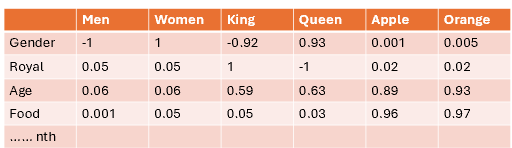

              [ KING - MAN + QUEEN = WOMEN ]

* Here each and every vocabulary is represented based on the feature representation. The features can be 300 or 500 etc.,
* Word2Vec has a pretrained model or we can also train from scratch. Google trained the word2vec with 3 billion feature representation.

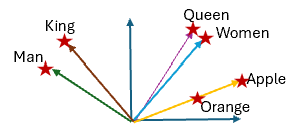

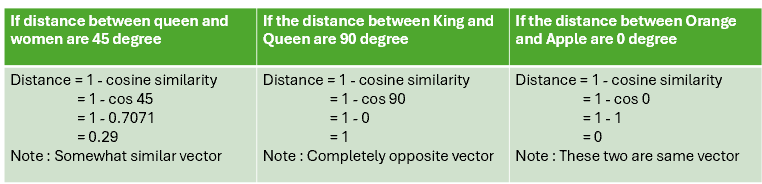

##### Two Types of Word2 Vec:
* Continuous Bag of Words (CBOW)
* SkipGram

### 1. Continuous Bag of Words (CBOW)

* Predict the target word from the context (Fake Problem)
* Solve this fake problem using neural network, as a result you will get word embeddings as a side effect.
  ( Our goal is not to find the missing word in the sentence, but to learn word embedding as the side effect )

#### eg : Corpus : King order ministers , emperor ordered ministers.

##### Step 1 : Determine the window size, and determine the input and output to generate training set for neural network

( Tip : Take an odd number , so that the center will be target )

 #####            eg : window size = 5 ( predict center word based on the surrounded context word )

Window size 5 means --> I want to provide feature represention of word with the vector size of 5

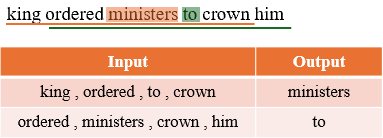

##### Step 2 : We initially we convert the vocabulary into vectors using One Hot Encoding (0HE)

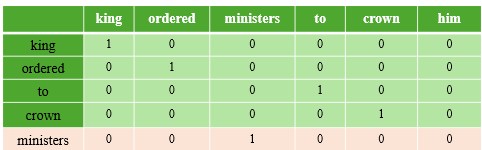

##### Step 3: Now construct fully connected neural network

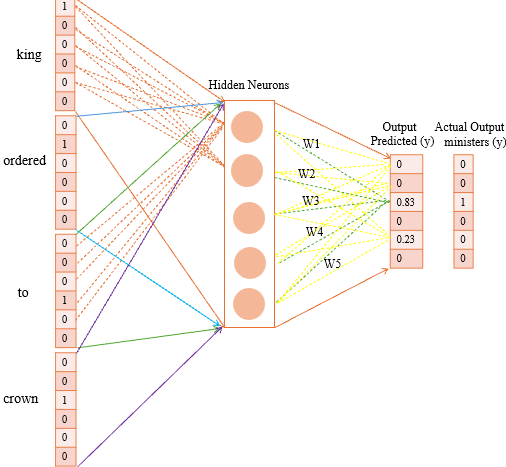

* Forward and Backward propogation is done to reduce the loss.
* The final vectors of ministers is [w1, w2, w3, w4, w5], king is [[w1, w2, w3, w4, w5] so on..
* In this way the semantic relationship is stored.

### 2. Skip Gram

* Predict the context word using the target word (Fake Problem)

##### Step 1 : Determine the window size, and determine the input and output to generate training set for neural network

#####            eg : window size = 5

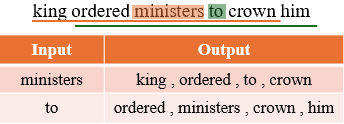

##### Step 2 : We initially we convert the vocabulary into vectors using One Hot Encoding (0HE)

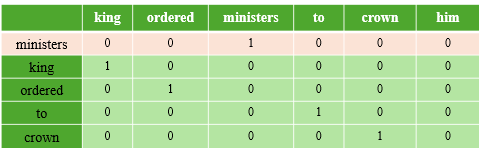

##### Step 3: Now construct fully connected neural network

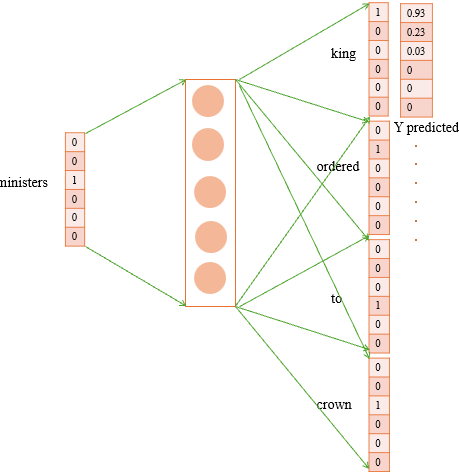

##### Note :

##### 1. When should you apply CBOW or Skip Gram ?

* Small Dataset --> CBOW
* Huge Dataset --> Skip Gram

##### 2. How to improve accuracy ?

* Increase the window size, which will lead to increase the vector dimention

##### 1. Continuous Bag of Words ( CBOW )

predict the target word from the context

##### 2. Skip Gram

Predict the Context words from target

### 1. Practical Implementation

In [1]:
import nltk
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords

##### Step 1 : Reading the data

In [2]:
paragraph = "The Bible does not give one specific definition of God. Instead, it assumes God's existence from the beginning and reveals His nature and work throughout. God is understood as the supreme being and the creator of the universe."
print(paragraph)

The Bible does not give one specific definition of God. Instead, it assumes God's existence from the beginning and reveals His nature and work throughout. God is understood as the supreme being and the creator of the universe.


##### Step 2 : Cleaning the texts

In [3]:
# Import the Libraries

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Create an object

stop_words = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()

# Cleaning

clean_text = re.sub('[^A-Za-z0-9]', ' ',paragraph)
clean_text = clean_text.lower()
sent_token = nltk.sent_tokenize(clean_text)
word_token = [nltk.word_tokenize(sentence) for sentence in sent_token]
    
for i in range(len(word_token)):
    word_token[i] = [ word for word in word_token[i] if word not in stop_words]

In [9]:
# Training the word2vec model
model_word2vec = Word2Vec(word_token, min_count=1)

In [10]:
# words present in word2vec model
words = model_word2vec.wv.index_to_key
words

['god',
 'universe',
 'creator',
 'give',
 'one',
 'specific',
 'definition',
 'instead',
 'assumes',
 'existence',
 'beginning',
 'reveals',
 'nature',
 'work',
 'throughout',
 'understood',
 'supreme',
 'bible']

In [11]:
#for each word you will be having from vectors
vector = model_word2vec.wv['god']
vector

array([-5.3816836e-04,  2.3856484e-04,  5.1023345e-03,  9.0108393e-03,
       -9.2995204e-03, -7.1143927e-03,  6.4619291e-03,  8.9722835e-03,
       -5.0193304e-03, -3.7611353e-03,  7.3812795e-03, -1.5343506e-03,
       -4.5340532e-03,  6.5546939e-03, -4.8580039e-03, -1.8168020e-03,
        2.8767518e-03,  9.9405972e-04, -8.2859658e-03, -9.4524911e-03,
        7.3109805e-03,  5.0697769e-03,  6.7628510e-03,  7.6142460e-04,
        6.3517750e-03, -3.4045647e-03, -9.4697549e-04,  5.7665138e-03,
       -7.5224340e-03, -3.9378335e-03, -7.5063142e-03, -9.3015947e-04,
        9.5387977e-03, -7.3165833e-03, -2.3341021e-03, -1.9368802e-03,
        8.0748023e-03, -5.9291795e-03,  4.5013239e-05, -4.7571408e-03,
       -9.6023008e-03,  5.0059031e-03, -8.7594939e-03, -4.3909331e-03,
       -3.3854769e-05, -2.9557504e-04, -7.6611070e-03,  9.6131992e-03,
        4.9796957e-03,  9.2300503e-03, -8.1564700e-03,  4.4942671e-03,
       -4.1377363e-03,  8.2271360e-04,  8.4966235e-03, -4.4660959e-03,
      

# finding most similar word

In [12]:
similar = model_word2vec.wv.most_similar('god')
similar

[('supreme', 0.21882030367851257),
 ('existence', 0.21624904870986938),
 ('nature', 0.0931253507733345),
 ('instead', 0.09289650619029999),
 ('reveals', 0.07982881367206573),
 ('beginning', 0.0629693865776062),
 ('understood', 0.054302725940942764),
 ('assumes', 0.02737444080412388),
 ('definition', 0.016163991764187813),
 ('universe', -0.010687862522900105)]

# 5 . Average Word2Vec

* We cannot solve a classification problem problem with Word2Vec alone, we also need Avg Word2Vec

#####  Step 1 : convert the words into vectors using Word2Vec

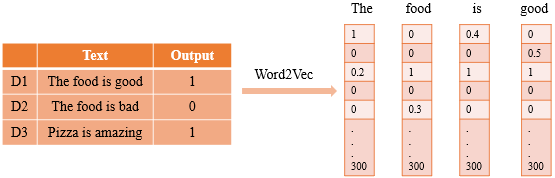
* Here , for each word we get 300 dimension vector, but we need only 1 300 dimension for a sentence to take as an input. In order to solve this , we need to avaerage the vectors.

##### Step 2 : Find Average of vectors

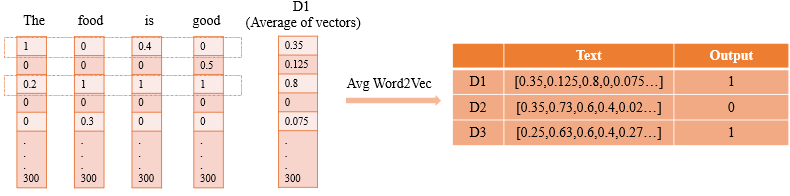

word2vec - it gives same vector for "APPLE" eg: apple phone , apple fruit